# Initialization 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


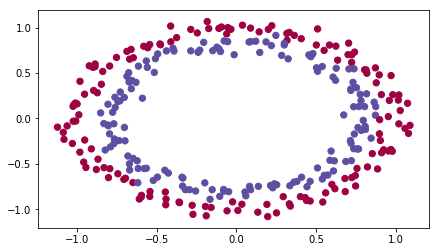

In [3]:
# Load Datasets
train_X, train_Y, test_X, test_Y = load_dataset()

## Neural Network Model
3-layer Neural Network

* Initialization Methods:
    * Zeros Initialization
    * Random Initialization
    * He Initialization

In [21]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization='he'):
    
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initalize parameters
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
        
    # Loop gradient descent
    for i in range(num_iterations):
        
        # Forward Propagation
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)
        
        # Backward propagation
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss
        if print_cost and i % 1000 == 0:
            print('Cost after iterstions {}: {}'.format(i,cost))
            costs.append(cost)
            
    # Plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations per hundreds')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

In [10]:
## Zeros Initialization
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)
    for i in range(1, L):
        parameters['W'+str(i)] = np.zeros((layers_dims[i], layers_dims[i-1]))
        parameters['b'+str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [11]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


In [9]:
## Random Initialization
def initialize_parameters_random(layers_dims):
    parameters = {}
    L = len(layers_dims)
    np.random.seed(3)
    
    for i in range(1, L):
        parameters['W'+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])*10
        parameters['b'+str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [12]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


In [13]:
# He Initialization
def initialize_parameters_he(layers_dims):
    parameters = {}
    L = len(layers_dims)
    np.random.seed(3)
    
    for i in range(1,L):
        parameters['W'+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])*np.sqrt(2/layers_dims[i-1])
        parameters['b'+str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [14]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


## Running with different initializations

### Zeros

Cost after iterstions 0: 0.6931471805599453
Cost after iterstions 1000: 0.6931471805599453
Cost after iterstions 2000: 0.6931471805599453
Cost after iterstions 3000: 0.6931471805599453
Cost after iterstions 4000: 0.6931471805599453
Cost after iterstions 5000: 0.6931471805599453
Cost after iterstions 6000: 0.6931471805599453
Cost after iterstions 7000: 0.6931471805599453
Cost after iterstions 8000: 0.6931471805599453
Cost after iterstions 9000: 0.6931471805599453
Cost after iterstions 10000: 0.6931471805599455
Cost after iterstions 11000: 0.6931471805599453
Cost after iterstions 12000: 0.6931471805599453
Cost after iterstions 13000: 0.6931471805599453
Cost after iterstions 14000: 0.6931471805599453


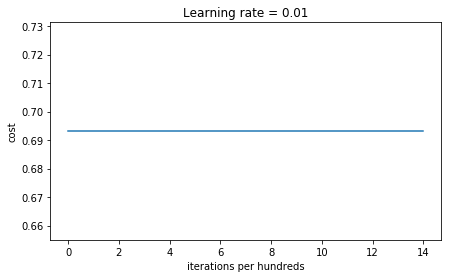

On the train set: 
Accuracy: 0.5
On the test set: 
Accuracy: 0.5


In [15]:
parameters = model(train_X, train_Y, initialization='zeros')
print('On the train set: ')
predictions_train = predict(train_X, train_Y,parameters)
print('On the test set: ')
predictions_test = predict(test_X, test_Y, parameters)

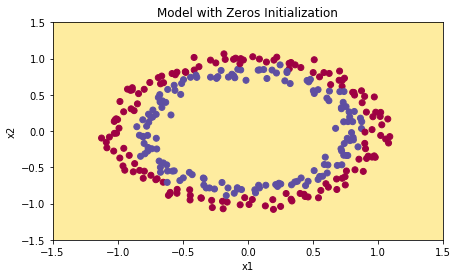

In [16]:
plt.title('Model with Zeros Initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Random

E:\GoogleDrive\00.GitHub\OpenCourses_Exercises\000_DeepLearning\05_Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\GoogleDrive\00.GitHub\OpenCourses_Exercises\000_DeepLearning\05_Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iterstions 0: inf
Cost after iterstions 1000: 0.6250982793959966
Cost after iterstions 2000: 0.5981216596703697
Cost after iterstions 3000: 0.5638417572298645
Cost after iterstions 4000: 0.5501703049199763
Cost after iterstions 5000: 0.5444632909664456
Cost after iterstions 6000: 0.5374513807000807
Cost after iterstions 7000: 0.4764042074074983
Cost after iterstions 8000: 0.39781492295092263
Cost after iterstions 9000: 0.3934764028765484
Cost after iterstions 10000: 0.3920295461882659
Cost after iterstions 11000: 0.38924598135108
Cost after iterstions 12000: 0.3861547485712325
Cost after iterstions 13000: 0.384984728909703
Cost after iterstions 14000: 0.3827828308349524


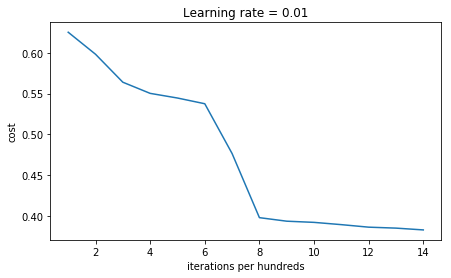

On the train set :
Accuracy: 0.83
On the test set: 
Accuracy: 0.86


In [18]:
parameters = model(train_X, train_Y, initialization='random')
print('On the train set :')
predictions_train = predict(train_X, train_Y, parameters)
print('On the test set: ')
predictions_test = predict(test_X, test_Y, parameters)

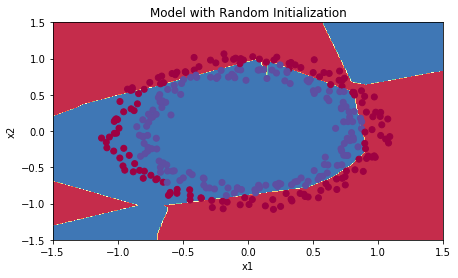

In [19]:
plt.title('Model with Random Initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### He

Cost after iterstions 0: 0.8830537463419761
Cost after iterstions 1000: 0.6879825919728063
Cost after iterstions 2000: 0.6751286264523371
Cost after iterstions 3000: 0.6526117768893807
Cost after iterstions 4000: 0.6082958970572937
Cost after iterstions 5000: 0.5304944491717495
Cost after iterstions 6000: 0.4138645817071793
Cost after iterstions 7000: 0.3117803464844441
Cost after iterstions 8000: 0.23696215330322556
Cost after iterstions 9000: 0.18597287209206828
Cost after iterstions 10000: 0.15015556280371808
Cost after iterstions 11000: 0.12325079292273548
Cost after iterstions 12000: 0.09917746546525937
Cost after iterstions 13000: 0.08457055954024274
Cost after iterstions 14000: 0.07357895962677366


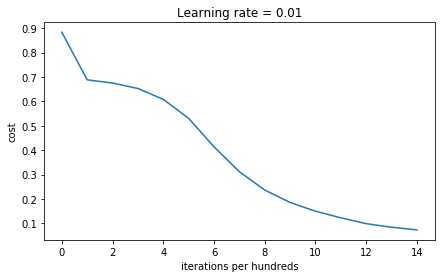

On the train set: 
Accuracy: 0.993333333333
On the test set: 
Accuracy: 0.96


In [22]:
parameters = model(train_X, train_Y, initialization='he')
print('On the train set: ')
predictions_train = predict(train_X, train_Y, parameters)
print('On the test set: ')
predictions_test = predict(test_X, test_Y, parameters)

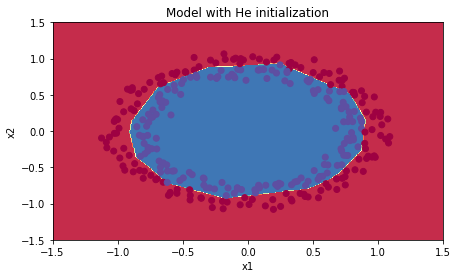

In [24]:
plt.title('Model with He initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

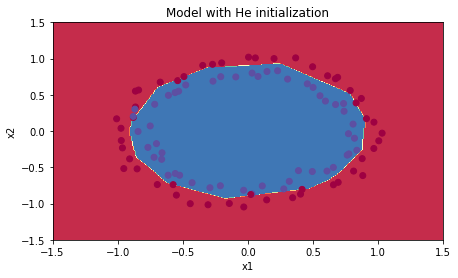

In [25]:
plt.title('Model with He initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)